# Problem Set 3  - Titanic Survival Prediction 

In [42]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Exploration

In [43]:
# 1. Data Exploration
# Load data
train = pd.read_csv('titanic3.csv')
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Data Description:
survival - Survival (0 = No; 1 = Yes)
<br> class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
<br> name - Name
<br> sex - Sex
<br> age - Age
<br> sibsp - Number of Siblings/Spouses Aboard
<br> parch - Number of Parents/Children Aboard
<br> ticket - Ticket Number
<br> fare - Passenger Fare
<br> cabin - Cabin
<br> embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
<br> boat - Lifeboat (if survived)
<br> body - Body number (if did not survive and body was recovered)

## 2. Data Processing

In [44]:
# Handle missing values by imputation or dropping rows/columns.
train.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [45]:
# Remove the boat, ticket and body data
train = train.drop(['boat', 'ticket', 'body'], axis=1)

# Fill the missing age values with mean value
train['age'] = train['age'].fillna(train['age'].mean())

# Handle missing values by imputation
train = train.dropna(subset=['survived'])
train = train.fillna(train.mode().iloc[0])

# Check for missing values
train.isnull().sum()


pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
fare         0
cabin        0
embarked     0
home.dest    0
dtype: int64

In [46]:
# Convert 'Sex' column to numeric values
train['sex'] = train['sex'].replace('male', 0)
train['sex'] = train['sex'].replace('female', 1)
train.head()

/tmp/ipykernel_45834/3672696939.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['sex'] = train['sex'].replace('female', 1)


,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,29.0000,0.0,0.0,211.3375,B5,S,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,0.9167,1.0,2.0,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,2.0000,1.0,2.0,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1.0,2.0,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1.0,2.0,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


## 3. Exploratory Data Analysis (EDA)

In [47]:
train.describe()

,pclass,survived,sex,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.355997,29.881135,0.498854,0.385027,33.276193
std,0.837836,0.486055,0.478997,12.883199,1.041658,0.865560,51.743584
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,0.000000,29.881135,0.000000,0.000000,14.454200
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200


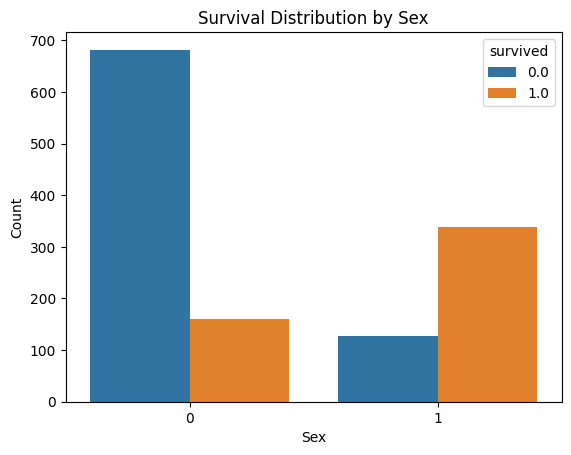

In [48]:
# Survival Distribution by Sex
sns.countplot(data=train, x='sex', hue='survived')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Distribution by Sex')
plt.show()

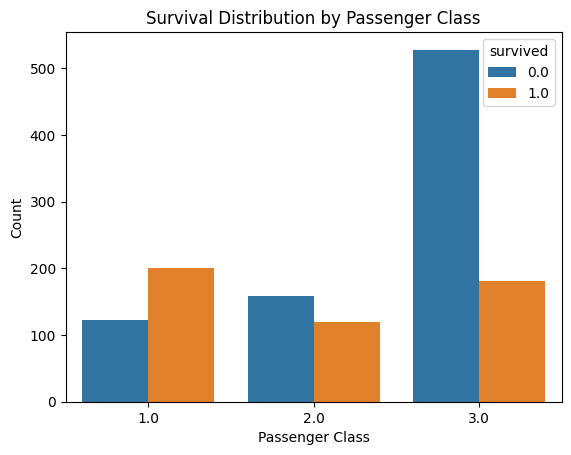

In [49]:
# Survival Distribution by Passenger Class
sns.countplot(data=train, x='pclass', hue='survived')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Distribution by Passenger Class')
plt.show()


## 4. Feature Selection:

/tmp/ipykernel_45834/3652093558.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_df = train.groupby('AgeGroup')['survived'].mean()


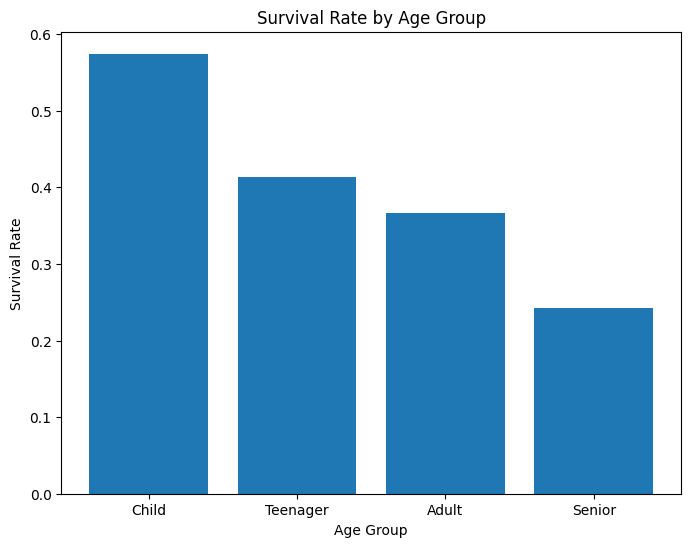

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,home.dest,AgeGroup
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,29.0000,0.0,0.0,211.3375,B5,S,"St Louis, MO",Adult
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,0.9167,1.0,2.0,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Child
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,2.0000,1.0,2.0,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Child
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1.0,2.0,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Adult
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1.0,2.0,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Adult


In [50]:
# Convert "age" to categorical data "AgeGroup"

bins = [0, 12, 18, 60, np.inf]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train['age'], bins=bins, labels=labels)

# Define the age_group_df DataFrame
age_group_df = train.groupby('AgeGroup')['survived'].mean()

# Plot the survival rate for each age group
plt.figure(figsize=(8, 6))
plt.bar(age_group_df.index, age_group_df.values)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

train.head()

In [51]:
train['AgeGroup'] = train['AgeGroup'].map({'Child': 1, 'Teenager': 2, 'Adult': 3, 'Senior': 4})
train['AgeGroup'] = train['AgeGroup'].astype('int64')

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,home.dest,AgeGroup
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,29.0000,0.0,0.0,211.3375,B5,S,"St Louis, MO",3
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,0.9167,1.0,2.0,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,2.0000,1.0,2.0,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1.0,2.0,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",3
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1.0,2.0,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",3


In [52]:
# Create New Features— 'FamilySize' and 'IsAlone'
train['FamilySize'] = train['sibsp'] + train['parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

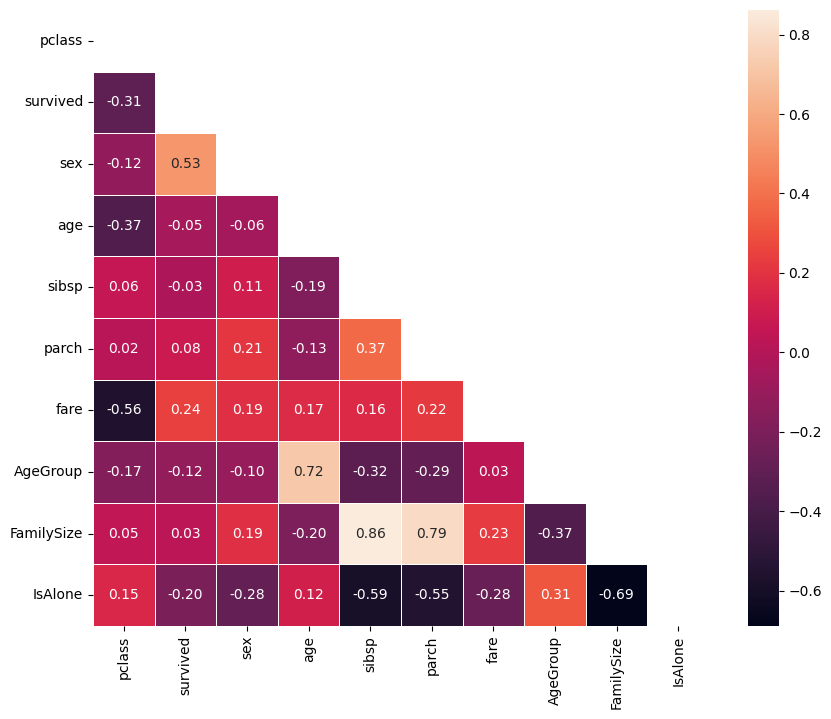

In [53]:
# Correlation Matrix
numerical_df = train.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', square=True, linewidths=.5)

plt.show()

### Findings
1. Sex is strongly positive correlated with survived (0.53), suggesting that female passerngers had a better chance of survival.
2. Pclass is negatively correlated with survived (-0.31), indicating higher-class passengers had a better chance of survival.
3. Fare is positively correlated with survived (0.24), suggesting passengers who paid more had higher survival rates.
4. IsAlone is negatively correlated with survived (-0.20), suggesting passengers alone had lower survival rates.
5. AgeGroup is sightly negatively correlated with survived (-0.12), indicating that youger passengers had a better chance of survival.

Therefore, the prediction model will be focused on these 5 features.

## 5. Model Building:

In [54]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(train, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

train_data.head()


Training set shape: (1047, 14)
Testing set shape: (262, 14)


,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,home.dest,AgeGroup,FamilySize,IsAlone
772,3.0,0.0,"Dika, Mr. Mirko",0,17.000000,0.0,0.0,7.8958,C23 C25 C27,S,"New York, NY",2,1.0,1
543,2.0,0.0,"Reeves, Mr. David",0,36.000000,0.0,0.0,10.5000,C23 C25 C27,S,"Brighton, Sussex",3,1.0,1
289,1.0,1.0,"Taussig, Miss. Ruth",1,18.000000,0.0,2.0,79.6500,E68,S,"New York, NY",2,3.0,0
10,1.0,0.0,"Astor, Col. John Jacob",0,47.000000,1.0,0.0,227.5250,C62 C64,C,"New York, NY",3,2.0,0
147,1.0,0.0,"Harrington, Mr. Charles H",0,29.881135,0.0,0.0,42.4000,C23 C25 C27,S,"New York, NY",3,1.0,1


### 5.1 Decision Trees Model

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

y_train = train_data["survived"]
y_test = test_data["survived"]

features = ["pclass", "sex", "fare", "IsAlone", "AgeGroup"]
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Create the Decision Tree model
dectree = DecisionTreeClassifier()

# Define the parameter values that should be searched
param_grid = {'max_depth': list(range(1, 11)), 'min_samples_split': list(range(2, 11))}

# Instantiate the grid
grid = GridSearchCV(dectree, param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X_train, y_train)

# View the optimal parameters
print("Best parameters: ", grid.best_params_)

# Use the best estimator from GridSearchCV for predictions
best_dectree = grid.best_estimator_
predictions_dectree = best_dectree.predict(X_test)

Best parameters:  {'max_depth': 5, 'min_samples_split': 2}


### 5.2 Random Forest Model

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

y_train = train_data["survived"]
y_test = test_data["survived"]

features = ["pclass", "sex", "fare", "IsAlone", "AgeGroup"]
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Create the Random Forest model
ranfor = RandomForestClassifier(random_state=1)

# Define the parameter values that should be searched
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': list(range(1, 11))}

# Instantiate the grid
grid = GridSearchCV(ranfor, param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X_train, y_train)

# View the optimal parameters
print("Best parameters: ", grid.best_params_)

# Use the best estimator from GridSearchCV for predictions
best_ranfor = grid.best_estimator_
predictions_ranfor = best_ranfor.predict(X_test)

Best parameters:  {'max_depth': 7, 'n_estimators': 50}


## 6. Model Evaluation

In [57]:
from sklearn.metrics import accuracy_score


accuracy_dectree = accuracy_score(y_test, predictions_dectree)
accuracy_ranfor = accuracy_score(y_test, predictions_ranfor)

print ("Accuracy of Decision Tree:", accuracy_dectree)
print ("Accuracy of Random Forest:", accuracy_ranfor)


Accuracy of Decision Tree: 0.7519083969465649
Accuracy of Random Forest: 0.7748091603053435


### Evaluation Result
The result shows that the Random Forest Model has higher accuracy rate (0.7748091603053435) in this case.

## 7. Prediction and Conclusion:

In [41]:
# Export the predictions to a .csv file
output = pd.DataFrame({'PassengerId': test_data.index, "pclass": test_data.pclass, "sex": test_data.sex, "fare": test_data.fare, "IsAlone": test_data.IsAlone, "AgeGroup": test_data.AgeGroup, 'survived': predictions_ranfor})
output.to_csv('prediction.csv', index=False)

### Observation
1. Preprocessing data is an important step. By changing the way to fill missing age data and creating categorical features, the accuracy has been improved by 0.02.
2. When researching about how to improve the accuracy (source: https://www.kaggle.com/competitions/titanic/discussion/57447), I found that there is additional information in the names, but I have neglected them in my analysis.